In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols 
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro 
from scipy.stats import bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison


In [2]:
df= pd.read_csv('MDf_NAFilled.csv')
df

,Unnamed: 0,Unnamed: 0.1,ADMID,PATIENTID,Average_Age,PROBLEM,PROB_NAME,ADM_DATE,DIS_DATE,LOS,...,Ionised calcium,Lactate,White cell,DBP,HEIGHT,HR,O2SAT,RR,SBP,WEIGHT
0,0,0,566AF9016D2E9318EA7A3B3B8EF4441ABFE079F185CDB2...,3AB8F46DDDA4CC8466E3146BB26D8B5BD9E3B72D64EF22...,92,700097003.0,Hip fracture,35550,35565,15,...,1.220000,2.200000,12.270000,64.0,67.200000,80.0,96.0,14.0,141.0,69.999200
1,1,1,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,700097003.0,Hip fracture,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
2,2,2,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,5913000.0,Fracture of neck of left femur,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
3,3,3,A53241F3859B28AC2E43A68B8B24BE5806EA1341B1D16D...,4801FB1837D0F9A5F6041D39E48A72E9AC054365A4D202...,77,127287001.0,Intertrochanteric fracture of left hip,30203,30205,2,...,1.172366,1.787164,8.600000,63.0,64.790197,74.0,93.0,15.0,104.0,63.219396
4,4,4,BFA87E0D17A3084607B9439431707EEE54189FAC5AE26C...,CA5F39A757C1E534F2A95B3C730401ADEC3422C54A3F70...,82,127287001.0,Intertrochanteric fracture of left hip,32191,32196,5,...,1.230000,1.400000,12.870000,67.0,64.790197,91.0,100.0,15.0,112.0,63.219396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1203,1447,5264ED483D6DD14F34C7F41DBF5075B1812CB3149AB7F7...,59F3A979B8E5C797D425696F17530AC9EA020C2DCB9195...,82,700097003.0,"Hip fracture, right",31577,31594,17,...,1.120000,0.900000,11.700000,44.0,64.790197,96.0,97.0,16.0,98.0,63.219396
1204,1204,1448,9D04FE81A460B8242DC9548F2CD8921F4E0936A888C8A3...,222C0D67EE0A7D3722DFC9745E76074612AC706520EF06...,82,5913000.0,Fracture of neck of left femur,32235,32251,16,...,1.172366,1.787164,10.382805,54.0,64.790197,109.0,95.0,16.0,112.0,63.219396
1205,1205,1449,665FFC079CC5ACD04A4F6A7F7FF724897586A3AC6625B8...,92CF2F32964A9F8CAD9DF05CF7EBE8D7E3B5B1729C7AE1...,87,5913000.0,Fracture of neck of right femur,34372,34381,9,...,1.172366,1.787164,10.382805,50.0,64.790197,73.0,98.0,16.0,123.0,63.219396
1206,1206,1450,5FDAC7A8655D26734D99CE76A5CCDCDBC08243A5F0D860...,C77CE976D4B2D0F75FD3CF77B7119E4AC9208FE374097F...,92,5913000.0,Fracture of neck of left femur,35807,35814,7,...,1.172366,1.787164,13.000000,60.0,60.000000,91.0,97.0,15.0,114.0,63.219396


In [3]:
# Plotting Cancer Against LOS




In [4]:
Cancer = df.pivot(columns = 'CANCER', values = 'LOS')
Cancer

CANCER,N,Y
0,NaN,15.0
1,NaN,34.0
2,NaN,34.0
3,NaN,2.0
4,NaN,5.0
...,...,...
1203,NaN,17.0
1204,NaN,16.0
1205,NaN,9.0
1206,NaN,7.0


In [5]:
Cancer.describe()

CANCER,N,Y
count,246.000000,962.000000
mean,12.174797,16.310811
std,8.649521,11.351909
min,0.000000,2.000000
25%,7.000000,9.000000
50%,10.000000,13.000000
75%,14.750000,20.000000
max,52.000000,88.000000


In [6]:
conda install statsmodels

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'LOS [days]')

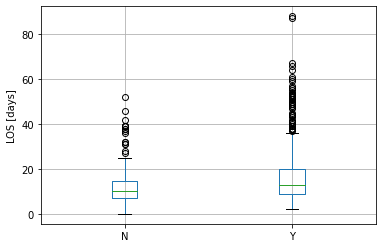

In [7]:
Cancer.boxplot()
plt.ylabel('LOS [days]')
#Not normally distrisbuted in this population therfore Kruskal Wallis used 

In [8]:
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 

In [9]:
from scipy.stats import kruskal
Yes = Cancer.Y.dropna()
No = Cancer.N.dropna()
kruskal(Yes,No)

KruskalResult(statistic=40.069545568847936, pvalue=2.450801914137185e-10)

In [10]:
# Signififcant Result !!

In [11]:
from scipy.stats import levene 
levene(Yes,No)
#As the p-value <0.05  we see that each group does not appear to have the same variance

LeveneResult(statistic=9.599533240743796, pvalue=0.0019912665711326084)

In [12]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [13]:
from scikit_posthocs import posthoc_dunn

posthoc_dunn(df , val_col='LOS', group_col
= 'CANCER')

,N,Y
N,1.000000e+00,2.450802e-10
Y,2.450802e-10,1.000000e+00


In [14]:
## Gender Vs LOS

In [15]:
GenderDF = df.pivot(columns = 'GENDER', values = 'LOS')
GenderDF

GENDER,1,2
0,15.0,NaN
1,NaN,34.0
2,NaN,34.0
3,NaN,2.0
4,NaN,5.0
...,...,...
1203,17.0,NaN
1204,NaN,16.0
1205,NaN,9.0
1206,NaN,7.0


In [16]:
GenderDF = df.pivot(columns = 'GENDER', values = 'LOS')
GenderDF

GENDER,1,2
0,15.0,NaN
1,NaN,34.0
2,NaN,34.0
3,NaN,2.0
4,NaN,5.0
...,...,...
1203,17.0,NaN
1204,NaN,16.0
1205,NaN,9.0
1206,NaN,7.0


<AxesSubplot:>

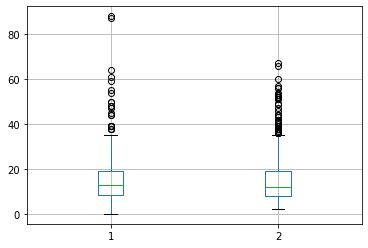

In [17]:
GenderDF.boxplot()

In [18]:
GenderDF.describe()

GENDER,1,2
count,362.000000,846.000000
mean,15.867403,15.297872
std,11.758846,10.632257
min,0.000000,2.000000
25%,8.250000,8.000000
50%,13.000000,12.000000
75%,19.000000,19.000000
max,88.000000,67.000000


In [19]:
Male = GenderDF[1].dropna()
Female = GenderDF[2].dropna()
kruskal(Male,Female)
#No Significant Differece therefore dont need to continue any further

KruskalResult(statistic=0.631390294157973, pvalue=0.426845803078701)

In [20]:
## LOS Vs Age Group 



In [21]:
Age_Group = df.pivot(columns = 'Average_Age', values = 'LOS')
Age_Group

Average_Age,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97,102
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
1204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN
1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [22]:
Age_Group.describe()

Average_Age,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97,102
count,1.0,1.0,3.000000,3.000000,3.000000,7.000000,9.000000,15.000000,24.000000,68.000000,104.000000,159.000000,214.000000,281.000000,218.000000,93.000000,5.00000
mean,7.0,3.0,9.000000,14.000000,6.000000,16.285714,13.111111,7.666667,6.875000,12.264706,12.519231,15.283019,14.794393,16.455516,18.385321,17.408602,18.80000
std,NaN,NaN,5.196152,10.392305,3.605551,14.522560,10.623611,7.077799,3.779953,11.513286,11.182494,10.926180,10.794485,9.060451,12.604884,11.022937,9.14877
min,7.0,3.0,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000,2.000000,9.00000
25%,7.0,3.0,7.500000,11.000000,4.000000,4.500000,6.000000,3.500000,4.000000,5.000000,6.000000,8.000000,8.250000,10.000000,11.000000,9.000000,12.00000
50%,7.0,3.0,12.000000,20.000000,5.000000,9.000000,9.000000,4.000000,6.000000,9.000000,8.500000,12.000000,12.000000,14.000000,14.000000,15.000000,18.00000
75%,7.0,3.0,12.000000,20.000000,7.500000,27.000000,14.000000,8.500000,8.250000,13.500000,14.250000,18.000000,18.000000,20.000000,23.000000,22.000000,23.00000
max,7.0,3.0,12.000000,20.000000,10.000000,39.000000,31.000000,28.000000,18.000000,67.000000,61.000000,56.000000,66.000000,64.000000,88.000000,53.000000,32.00000


Text(0, 0.5, 'LOS [days]')

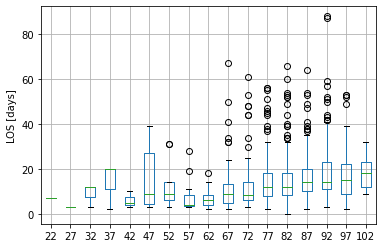

In [23]:
Age_Group.boxplot()
plt.ylabel('LOS [days]')

In [27]:
A = Age_Group[22].dropna()
B = Age_Group[27].dropna()
C = Age_Group[32].dropna()
D = Age_Group[37].dropna()
E = Age_Group[42].dropna()
F = Age_Group[47].dropna()
G = Age_Group[52].dropna()
H = Age_Group[57].dropna()
I = Age_Group[62].dropna()
J = Age_Group[67].dropna()
K = Age_Group[72].dropna()
L = Age_Group[77].dropna()
M = Age_Group[82].dropna()
N = Age_Group[87].dropna()
O = Age_Group[102].dropna()
kruskal(A,B,C,D,E,F,G,H,I,J,K,L,M,N,O)

KruskalResult(statistic=106.67767446338826, pvalue=2.4597002147377773e-16)

In [25]:
levene(A,B,C,D,E,F,G,H,I,J,K)
#As the p-value is quite large (0.46) we see that each group do appear to have the same variance

LeveneResult(statistic=0.9780564166474163, pvalue=0.46331066109642816)

In [26]:
posthoc_dunn(df, val_col='LOS', group_col
= 'Average_Age')

,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97,102
22,1.000000,0.689389,0.686676,0.316040,0.925102,0.381075,0.480719,9.377762e-01,9.870562e-01,5.422988e-01,5.200169e-01,0.287351,0.310858,1.843422e-01,1.658311e-01,1.824665e-01,0.142794
27,0.689389,1.000000,0.371921,0.135663,0.692473,0.160126,0.214466,5.317380e-01,5.686493e-01,2.418126e-01,2.278715e-01,0.103648,0.114716,5.852579e-02,5.121535e-02,5.803637e-02,0.047540
32,0.686676,0.371921,1.000000,0.396729,0.481806,0.495241,0.677207,5.425442e-01,4.632148e-01,8.018723e-01,7.577414e-01,0.301993,0.344124,1.365600e-01,1.122833e-01,1.359739e-01,0.118663
37,0.316040,0.135663,0.396729,1.000000,0.120931,0.748397,0.534161,8.855689e-02,6.238712e-02,3.565305e-01,3.825835e-01,0.876667,0.807112,7.668053e-01,6.908801e-01,7.555626e-01,0.539941
42,0.925102,0.692473,0.481806,0.120931,1.000000,0.129957,0.201332,7.648510e-01,8.381155e-01,2.207859e-01,1.973414e-01,0.043625,0.053124,1.320413e-02,9.995124e-03,1.350958e-02,0.018934
47,0.381075,0.160126,0.495241,0.748397,0.129957,1.000000,0.701587,6.154473e-02,3.224713e-02,4.163976e-01,4.576913e-01,0.734655,0.836241,3.038124e-01,2.386195e-01,3.026932e-01,0.253274
52,0.480719,0.214466,0.677207,0.534161,0.201332,0.701587,1.000000,1.160322e-01,6.298764e-02,7.150740e-01,7.803662e-01,0.344349,0.423231,8.323839e-02,5.769053e-02,8.720580e-02,0.122223
57,0.937776,0.531738,0.542544,0.088557,0.764851,0.061545,0.116032,1.000000e+00,8.456660e-01,6.160789e-02,4.051105e-02,0.000259,0.000463,2.427905e-06,9.529657e-07,5.971043e-06,0.003151
62,0.987056,0.568649,0.463215,0.062387,0.838116,0.032247,0.062988,8.456660e-01,1.000000e+00,1.188722e-02,5.413690e-03,0.000002,0.000003,6.593966e-10,1.759437e-10,7.384631e-09,0.001230
67,0.542299,0.241813,0.801872,0.356530,0.220786,0.416398,0.715074,6.160789e-02,1.188722e-02,1.000000e+00,8.344179e-01,0.001750,0.003881,1.168312e-07,2.401625e-08,5.276327e-06,0.032367


In [28]:
## LOS vs Operation Undertaken 


In [29]:
Op = df.pivot(columns = 'OPCS_DESC', values = 'LOS')
Op

OPCS_DESC,CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW,HEMIARTHROPLASTY HIP CANNULOK,HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM,HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM,OPEN REDUCTION INTERNAL FIXATION FEMUR,OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL,OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW,OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL,TOTAL HIP REPLACEMENT,TOTAL HIP REPLACEMENT CEMENTED,TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM
0,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1203,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

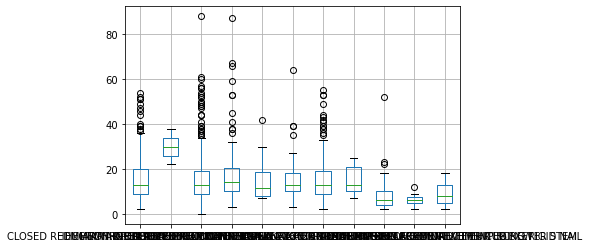

In [30]:
Op.boxplot()


In [31]:
Op.describe()

OPCS_DESC,CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW,HEMIARTHROPLASTY HIP CANNULOK,HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM,HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM,OPEN REDUCTION INTERNAL FIXATION FEMUR,OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL,OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW,OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL,TOTAL HIP REPLACEMENT,TOTAL HIP REPLACEMENT CEMENTED,TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM
count,189.000000,2.000000,408.000000,124.000000,12.000000,53.000000,329.000000,7.000000,62.000000,19.000000,3.000000
mean,16.153439,30.000000,16.191176,17.758065,15.666667,15.320755,15.179331,15.285714,8.387097,6.105263,9.333333
std,10.934172,11.313708,11.505910,13.486742,10.764701,10.555301,9.480792,7.158079,7.335865,2.354540,8.082904
min,2.000000,22.000000,0.000000,3.000000,7.000000,3.000000,2.000000,7.000000,2.000000,2.000000,2.000000
25%,9.000000,26.000000,9.000000,10.000000,8.000000,10.000000,9.000000,10.000000,4.000000,5.000000,5.000000
50%,13.000000,30.000000,13.000000,14.000000,11.500000,13.000000,13.000000,13.000000,6.000000,6.000000,8.000000
75%,20.000000,34.000000,19.000000,20.250000,18.500000,18.000000,19.000000,21.000000,10.000000,7.500000,13.000000
max,54.000000,38.000000,88.000000,87.000000,42.000000,64.000000,55.000000,25.000000,52.000000,12.000000,18.000000


In [32]:
list(Op.columns.values)

['CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW',
 'HEMIARTHROPLASTY HIP CANNULOK',
 'HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM',
 'HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM',
 'OPEN REDUCTION INTERNAL FIXATION FEMUR',
 'OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL',
 'OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW',
 'OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL',
 'TOTAL HIP REPLACEMENT',
 'TOTAL HIP REPLACEMENT CEMENTED',
 'TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM']

In [33]:
A = Op['CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW'].dropna()
B = Op['HEMIARTHROPLASTY HIP CANNULOK'].dropna()
C = Op['HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM'].dropna()
D = Op['HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM'].dropna()
E = Op['OPEN REDUCTION INTERNAL FIXATION FEMUR'].dropna()
F = Op['OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL'].dropna()
G = Op['OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW'].dropna()
H = Op['OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL'].dropna()
I = Op['TOTAL HIP REPLACEMENT'].dropna()
J = Op['TOTAL HIP REPLACEMENT CEMENTED'].dropna()
K = Op['TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM'].dropna()
kruskal(A,B,C,D,E,F,G,H,I,J,K)

KruskalResult(statistic=91.6562586494046, pvalue=2.5126588641747772e-15)

In [34]:
levene(A,B,C,D,E,F,G,H,I,J,K)
#As the p-value is quite large (0.24) we see that each group do appear to have the same variance

LeveneResult(statistic=2.062598312217318, pvalue=0.024713066761627624)

In [35]:
posthoc_dunn(df, val_col='LOS', group_col
= 'OPCS_DESC')

,CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW,HEMIARTHROPLASTY HIP CANNULOK,HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM,HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM,OPEN REDUCTION INTERNAL FIXATION FEMUR,OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL,OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW,OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL,TOTAL HIP REPLACEMENT,TOTAL HIP REPLACEMENT CEMENTED,TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM
CLOSED REDUCTION INSERTION DYNAMIC HIP SCREW,1.000000e+00,0.079851,9.319844e-01,2.695121e-01,0.828479,8.490267e-01,6.355010e-01,0.800071,2.678078e-11,8.049330e-08,0.231538
HEMIARTHROPLASTY HIP CANNULOK,7.985136e-02,1.000000,7.721370e-02,1.169426e-01,0.086414,7.680092e-02,6.929952e-02,0.152345,1.998241e-03,6.446881e-04,0.033457
HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM,9.319844e-01,0.077214,1.000000e+00,1.876284e-01,0.845730,8.798092e-01,6.294438e-01,0.782995,1.253684e-12,4.484694e-08,0.234638
HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM,2.695121e-01,0.116943,1.876284e-01,1.000000e+00,0.525148,3.381360e-01,1.049052e-01,0.938183,1.340093e-12,8.414319e-09,0.158560
OPEN REDUCTION INTERNAL FIXATION FEMUR,8.284795e-01,0.086414,8.457302e-01,5.251483e-01,1.000000,9.130466e-01,9.424013e-01,0.733425,3.880768e-03,8.764110e-04,0.327758
OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL,8.490267e-01,0.076801,8.798092e-01,3.381360e-01,0.913047,1.000000e+00,9.263890e-01,0.752028,4.309062e-07,2.368936e-06,0.261326
OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW,6.355010e-01,0.069300,6.294438e-01,1.049052e-01,0.942401,9.263890e-01,1.000000e+00,0.712526,1.682085e-11,1.222529e-07,0.260246
OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL,8.000710e-01,0.152345,7.829946e-01,9.381830e-01,0.733425,7.520282e-01,7.125262e-01,1.000000,7.139811e-03,1.681658e-03,0.250079
TOTAL HIP REPLACEMENT,2.678078e-11,0.001998,1.253684e-12,1.340093e-12,0.003881,4.309062e-07,1.682085e-11,0.007140,1.000000e+00,2.278211e-01,0.636954
TOTAL HIP REPLACEMENT CEMENTED,8.049330e-08,0.000645,4.484694e-08,8.414319e-09,0.000876,2.368936e-06,1.222529e-07,0.001682,2.278211e-01,1.000000e+00,0.338004
